In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pickle 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MNIST multiclassification/MNIST/train.csv')

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df = df.values
# print(df)

In [ ]:
# m,n=df.shape
# print (m,n)

Split Train Data as Training and Validation 

In [ ]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.0

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0
_,m_train = X_train.shape



Set Weights as random values between -0.5 & 0.5

In [ ]:
#np.random.rand give random number between 0-1
#by substitution 0.5 we will get the number between -0.5 & 0.5

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

Rectified Linear Unit (ReLU)

In [ ]:
def ReLU(Z):
    return np.maximum(0, Z)

Softmax Activation 


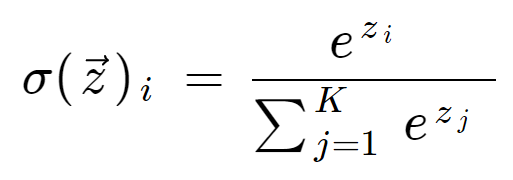

In [ ]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

Forward Propagation 

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

One hot Encoding 

In [ ]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

Derivative of RELU

In [ ]:
def dReLU(Z):
    return Z > 0

Backward Propagation

In [ ]:
def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * dReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

Updating Weights

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

Prediction and Accuracy

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


Gradient Descent 

In [ ]:
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i % 10 == 0):
            print('Iteration: ', i)
            print('Accuracy: ', get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.17)

Iteration:  0
[6 6 7 ... 6 6 6] [0 2 2 ... 9 9 4]
Accuracy:  0.06953658536585366
Iteration:  10
[1 7 7 ... 7 7 5] [0 2 2 ... 9 9 4]
Accuracy:  0.24448780487804878
Iteration:  20
[8 2 7 ... 7 7 9] [0 2 2 ... 9 9 4]
Accuracy:  0.39002439024390245
Iteration:  30
[8 2 7 ... 7 7 9] [0 2 2 ... 9 9 4]
Accuracy:  0.47085365853658534
Iteration:  40
[0 2 4 ... 7 7 9] [0 2 2 ... 9 9 4]
Accuracy:  0.5266585365853659
Iteration:  50
[0 2 4 ... 7 7 4] [0 2 2 ... 9 9 4]
Accuracy:  0.5726097560975609
Iteration:  60
[0 2 4 ... 7 9 4] [0 2 2 ... 9 9 4]
Accuracy:  0.6104146341463415
Iteration:  70
[0 2 4 ... 7 9 4] [0 2 2 ... 9 9 4]
Accuracy:  0.6438292682926829
Iteration:  80
[0 2 4 ... 7 9 4] [0 2 2 ... 9 9 4]
Accuracy:  0.6724146341463415
Iteration:  90
[0 2 4 ... 9 9 4] [0 2 2 ... 9 9 4]
Accuracy:  0.6958536585365853
Iteration:  100
[0 2 4 ... 9 9 4] [0 2 2 ... 9 9 4]
Accuracy:  0.7151463414634146
Iteration:  110
[0 2 4 ... 9 9 4] [0 2 2 ... 9 9 4]
Accuracy:  0.7306585365853658
Iteration:  120
[0 2 4 

Prediction

In [ ]:
def make_predictions(W1, b1, W2, b2, X):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    probability = np.amax(A2) * 100
    return predictions, probability

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction, prob = make_predictions(W1, b1, W2, b2, X_train[:, index, None])
    label = Y_train[index]
    
    print('Prediction :', prediction)
    print('Probability: ', prob, '%')
    print('Label: ', label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction : [7]
Probability:  99.87313124048023 %
Label:  7


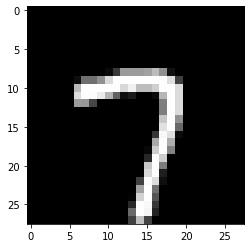

In [ ]:
test_prediction(30, W1, b1, W2, b2)

Prediction and Accuracy on Testing Data

In [ ]:
dev_predictions, _ = make_predictions(W1, b1, W2, b2, X_dev)
dev_acc = get_accuracy(dev_predictions, Y_dev) * 100

print('\nAccuracy on test data: ', dev_acc, '%')

[6 1 8 9 7 1 9 2 2 7 7 9 7 8 1 2 5 5 1 3 6 4 6 7 1 0 6 1 3 0 6 7 6 2 1 6 2
 3 6 2 7 7 6 3 2 4 1 7 0 4 3 5 1 0 5 9 1 3 7 6 7 2 3 8 6 9 7 1 8 1 8 6 6 1
 5 8 3 8 2 0 9 3 4 0 6 6 3 6 2 8 4 1 7 7 1 8 3 1 4 0 4 1 3 1 8 6 7 9 3 8 9
 6 4 9 1 9 1 7 8 4 4 6 4 7 4 7 1 2 8 1 9 0 1 3 1 6 7 9 4 4 7 0 9 7 4 1 5 4
 0 4 6 7 2 3 7 0 0 2 6 7 8 3 0 6 0 8 3 0 7 7 2 9 6 1 5 2 7 4 3 9 1 2 6 4 4
 3 7 3 3 2 6 8 7 2 8 0 2 9 6 7 4 2 9 2 0 0 5 8 6 2 4 5 9 0 0 1 3 7 2 4 2 8
 9 9 3 9 3 2 5 8 5 5 1 7 2 8 9 7 8 6 9 3 7 1 3 8 1 4 8 8 7 7 7 9 7 9 3 6 8
 1 7 6 7 4 3 2 6 6 2 1 5 2 2 2 7 7 4 1 9 3 5 8 9 4 3 6 7 4 3 9 0 8 9 7 9 0
 1 0 2 3 7 0 0 7 0 6 3 2 6 3 8 0 6 9 7 3 1 0 2 3 8 8 6 0 2 0 6 7 5 7 2 2 8
 4 0 2 1 8 1 8 9 4 6 7 4 6 2 1 0 9 8 9 2 2 6 7 2 3 3 0 8 5 1 3 3 0 9 6 5 7
 3 2 1 1 1 7 6 1 6 6 9 2 5 5 4 7 8 3 2 3 2 8 3 5 8 8 6 2 2 6 1 5 9 7 6 9 1
 2 7 4 9 1 0 9 6 7 3 2 1 5 9 0 6 0 0 2 8 0 9 1 6 4 4 9 3 6 4 0 1 0 5 8 6 1
 4 0 7 8 8 3 3 8 7 6 4 6 0 3 7 8 1 0 0 3 1 7 9 6 5 2 4 4 9 7 3 5 4 1 8 9 0
 7 5 6 8 0 7 9 1 8 7 3 2 

In [ ]:
print(W1,b1,W2,b2)

[[ 0.39872638 -0.40279261  0.08037527 ... -0.41503389  0.41991546
  -0.3980609 ]
 [-0.13566962  0.17479144  0.06590482 ... -0.02250101  0.27608359
   0.23949051]
 [-0.07429287 -0.44953722  0.07911522 ... -0.28669059  0.20824383
   0.40594293]
 ...
 [-0.1332582  -0.21583476 -0.20322816 ...  0.03257141  0.21544144
  -0.45778881]
 [-0.44402971 -0.15461071 -0.24058886 ...  0.3960956  -0.03565635
   0.45580578]
 [ 0.08605701 -0.36449696  0.37687394 ...  0.05626841 -0.41671411
  -0.09309548]] [[0.81385124]
 [0.99012197]
 [0.23546142]
 [0.85249197]
 [0.55882487]
 [0.14317745]
 [0.68438898]
 [0.88157863]
 [1.02843852]
 [0.66779086]] [[-0.19376137  0.55060779 -0.01714458  0.11491357 -0.63571786 -0.0679704
  -0.43127538 -0.84302394  0.43977547  0.54755128]
 [ 0.3236729  -0.9601583  -0.17188707  1.01637254  0.14805767 -0.09846668
   0.0695904  -0.01561348 -0.50104573 -0.62409264]
 [ 0.71847576 -0.1822159   0.26982257 -0.05262091  0.02708684 -0.22244285
   0.07536574 -0.58274734  0.30618878 -0.040

In [ ]:
with open('W1','wb') as files:
  pickle.dump(W1, files)

In [ ]:
with open('W2','wb') as files_1:
  pickle.dump(W2, files_1)

In [ ]:
with open('b1','wb') as files_2:
  pickle.dump(b1, files_2)

In [ ]:
with open('b2','wb') as files_3:
  pickle.dump(b2, files_3)